In [2]:
import pandas as pd

# 导入文本文件，使用逗号分割
courses_ori = pd.read_csv(r'D:\Users\Administrator\source\repos\ML_DL_DA\courses.txt', sep=',', header=0)
# 预览 DataFrame 前 5 行
courses_ori.head()


,创建时间,课程名称,学习人数,学习时间
0,2013/5/13 10:55,Linux 基础入门（新版）,391962,23875374
1,2013/5/13 10:58,Vim编辑器,118629,2590047
2,2013/5/13 10:58,Python编程语言,51879,1189731
3,2013/5/13 10:59,Git 实战教程,93153,2109564
4,2013/5/13 11:06,MySQL 基础课程,78792,4229313


In [3]:
i = pd.to_datetime(courses_ori['创建时间'])
i.head()

0   2013-05-13 10:55:00
1   2013-05-13 10:58:00
2   2013-05-13 10:58:00
3   2013-05-13 10:59:00
4   2013-05-13 11:06:00
Name: 创建时间, dtype: datetime64[ns]

In [4]:
# 将时间数据变为 DatetimeIndex 格式，这样时间就可以作为索引
courses_ts = pd.DataFrame(data=courses_ori.values,
                          columns=courses_ori.columns, index=i)
courses_ts.head()

,创建时间,课程名称,学习人数,学习时间
创建时间,,,,
2013-05-13 10:55:00,2013/5/13 10:55,Linux 基础入门（新版）,391962,23875374
2013-05-13 10:58:00,2013/5/13 10:58,Vim编辑器,118629,2590047
2013-05-13 10:58:00,2013/5/13 10:58,Python编程语言,51879,1189731
2013-05-13 10:59:00,2013/5/13 10:59,Git 实战教程,93153,2109564
2013-05-13 11:06:00,2013/5/13 11:06,MySQL 基础课程,78792,4229313


In [5]:
# 将原创建时间修改为了 courses_ts 的时间戳索引。但是，原来的创建时间列依旧存在，需要将其去除。
courses_ts = courses_ts.drop("创建时间", axis=1)
courses_ts.head()

,课程名称,学习人数,学习时间
创建时间,,,
2013-05-13 10:55:00,Linux 基础入门（新版）,391962,23875374
2013-05-13 10:58:00,Vim编辑器,118629,2590047
2013-05-13 10:58:00,Python编程语言,51879,1189731
2013-05-13 10:59:00,Git 实战教程,93153,2109564
2013-05-13 11:06:00,MySQL 基础课程,78792,4229313


In [6]:
# 按照周次频率进行降采样
courses_ts_W = courses_ts.resample('W').sum()
courses_ts_W.head()

,课程名称,学习人数,学习时间
创建时间,,,
2013-05-19,Linux 基础入门（新版）Vim编辑器Python编程语言Git 实战教程MySQL 基础课程,734415,33994029
2013-05-26,0,0,0
2013-06-02,0,0,0
2013-06-09,0,0,0
2013-06-16,0,0,0


Text(0, 0.5, 'Study Time')

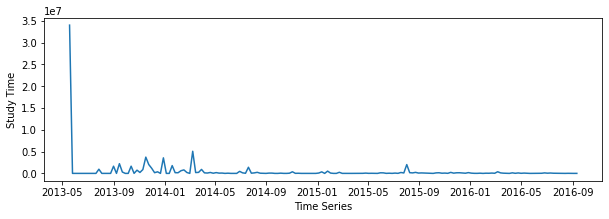

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 3))
plt.plot(courses_ts_W.index, courses_ts_W['学习时间'], '-')
plt.xlabel('Time Series')
plt.ylabel("Study Time")

d:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Study Time')

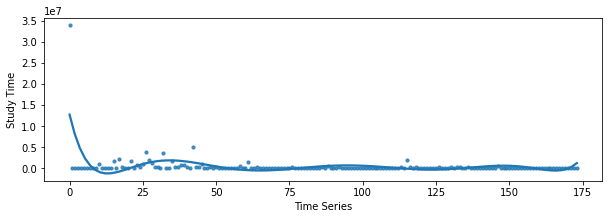

In [8]:
import seaborn as sns

# 新添加一个序数列，方便绘制散点图
courses_ts_W['id'] = range(0, len(courses_ts_W.index.values))

plt.figure(figsize=(10, 3))
sns.regplot("id", "学习时间", data=courses_ts_W, scatter_kws={
            "s": 10}, order=8, ci=None, truncate=True)
plt.xlabel('Time Series')
plt.ylabel("Study Time")

d:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Study Time')

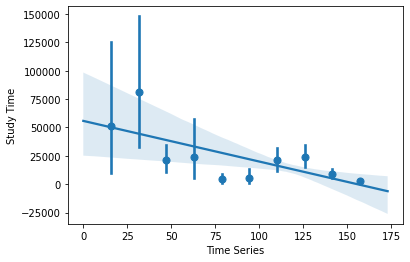

In [9]:
# 可以通过设置 x_bins= 参数，绘制出能更加直观反映上升或下降趋势的图像
sns.regplot("id", "学习人数", data=courses_ts_W, x_bins=10)

plt.xlabel('Time Series')
plt.ylabel("Study Time")


In [10]:
# 每次做单独分析时，最好复制一份整理好的数据，减少对原数据集影响
courses_ts_A = courses_ts.copy()

# 计算平均学习时间并添加列
courses_ts_A['平均学习时间'] = courses_ts_A['学习时间']/courses_ts_A['学习人数']
courses_ts_A.head()  # 预览


,课程名称,学习人数,学习时间,平均学习时间
创建时间,,,,
2013-05-13 10:55:00,Linux 基础入门（新版）,391962,23875374,60.912471
2013-05-13 10:58:00,Vim编辑器,118629,2590047,21.833169
2013-05-13 10:58:00,Python编程语言,51879,1189731,22.932805
2013-05-13 10:59:00,Git 实战教程,93153,2109564,22.646227
2013-05-13 11:06:00,MySQL 基础课程,78792,4229313,53.676934


In [11]:
courses_ts_A.sort_values(by='平均学习时间', ascending=False).head()


,课程名称,学习人数,学习时间,平均学习时间
创建时间,,,,
2016-07-18 17:43:00,通过代码审计学习Web安全,9,2241,249.0
2014-07-03 13:29:00,仿OpenStack开发云计算管理软件,330,72129,218.572727
2016-06-24 22:00:00,kafka代码实战--让你全面学习Kafka,39,8499,217.923077
2015-11-10 13:38:00,Kali 渗透测试 - 服务器攻击实战（20个实验）,327,71043,217.256881
2015-11-29 11:10:00,Kali 渗透测试 - Web 应用攻击实战,276,59640,216.086957


In [12]:
courses_ts_A.sort_values(by='平均学习时间', ascending=False).tail()


,课程名称,学习人数,学习时间,平均学习时间
创建时间,,,,
2015-02-26 18:33:00,制作jQuery插件,60,27,0.45
2014-07-31 15:38:00,掌阅科技Python工程师,1989,825,0.414781
2014-07-22 14:29:00,实验楼Python研发工程师,789,306,0.387833
2015-01-19 15:39:00,Android小案例 - ActionBar,120,36,0.3
2016-07-10 09:24:00,基于 Amazon AWS EC2 部署 Ghost 博客,18,0,0.0


In [13]:
# 添加新列
courses_ts_A['平均学习时间/人数'] = courses_ts_A['平均学习时间']/courses_ts_A['学习人数']

# 按照比值从小到大排序并显示前 10 条
courses_ts_A.sort_values(by='平均学习时间/人数').head(10)


,课程名称,学习人数,学习时间,平均学习时间,平均学习时间/人数
创建时间,,,,,
2016-07-10 09:24:00,基于 Amazon AWS EC2 部署 Ghost 博客,18,0,0.0,0.0
2013-11-19 18:32:00,新手指南之玩转实验楼,459144,2000568,4.357169,0.000009
2015-07-26 12:21:00,Python3 色情图片识别,33093,45141,1.364065,0.000041
2015-08-22 09:34:00,Python3 实现火车票查询工具,51150,147138,2.876598,0.000056
2014-07-17 09:43:00,200行Python代码实现2048,71685,313872,4.378489,0.000061
2015-08-03 13:50:00,高德API+Python解决租房问题,33348,76566,2.29597,0.000069
2014-07-17 17:42:00,Python 图片转字符画,106950,810180,7.575316,0.000071
2014-02-11 16:25:00,基于 JavaScript 实现玫瑰花,22332,41361,1.852096,0.000083
2015-01-23 11:31:00,经典算法解题实战,30393,100152,3.295232,0.000108


Text(0, 0.5, 'Number of Users')

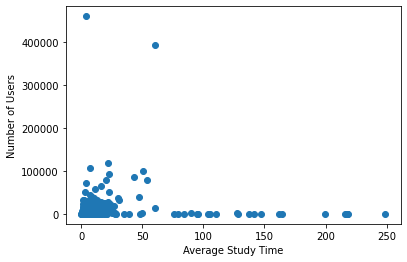

In [14]:
plt.scatter(courses_ts_A["平均学习时间"], courses_ts_A["学习人数"])
plt.xlabel('Average Study Time')
plt.ylabel("Number of Users")


In [15]:
# 导入 jieba 分词模块
from jieba import analyse
a = []
for i in courses_ts_A['课程名称']:
    # 使用 jieba 分词并使用 TF-IDF 算法抽取两个关键词，仅返回英文、名词、动词、动名词
    a.append(analyse.extract_tags(i, topK=2, withWeight=False,
                                  allowPOS=('eng', 'n', 'vn', 'v')))
keywords = pd.DataFrame(a, columns=['关键词 1', '关键词 2'])
keywords.head()


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.658 seconds.
Prefix dict has been built successfully.


,关键词 1,关键词 2
0,Linux,基础
1,Vim,编辑器
2,Python,编程语言
3,Git,教程
4,MySQL,课程


In [16]:
# 复制一份数据集用于聚类
courses_ts_C = courses_ts_A.copy()
# 重置索引方便数据集拼接
courses_ts_C = courses_ts_C.reset_index()
# 将复制数据集与关键词数据集拼接，并删掉时间列
courses_ts_merged = pd.concat(
    [courses_ts_C, keywords], axis=1).drop("创建时间", axis=1)
# 预览合并后数据集
courses_ts_merged.head()


,课程名称,学习人数,学习时间,平均学习时间,平均学习时间/人数,关键词 1,关键词 2
0,Linux 基础入门（新版）,391962,23875374,60.912471,0.000155,Linux,基础
1,Vim编辑器,118629,2590047,21.833169,0.000184,Vim,编辑器
2,Python编程语言,51879,1189731,22.932805,0.000442,Python,编程语言
3,Git 实战教程,93153,2109564,22.646227,0.000243,Git,教程
4,MySQL 基础课程,78792,4229313,53.676934,0.000681,MySQL,课程


In [17]:
# 针对关键词进行独热编码处理
onehot = pd.get_dummies(courses_ts_merged[['关键词 1', '关键词 2']])
# 预览
onehot.head()


,关键词 1_API,关键词 1_Amazon,关键词 1_Android,关键词 1_Angular,关键词 1_Ansible,关键词 1_BMP,关键词 1_Bootstrap,关键词 1_Bootstrap3,关键词 1_BurpSuite,关键词 1_CSS,...,关键词 2_错别字,关键词 2_问答,关键词 2_队列,关键词 2_防火墙,关键词 2_隐写术,关键词 2_集锦,关键词 2_页面,关键词 2_预览,关键词 2_验证码,关键词 2_高性能
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.decomposition import PCA

# 将特征缩小至 5 维
pca = PCA(n_components=5)
# 返回降维后的值
feature_pca = pca.fit_transform(onehot)
feature_pca.shape


(484, 5)

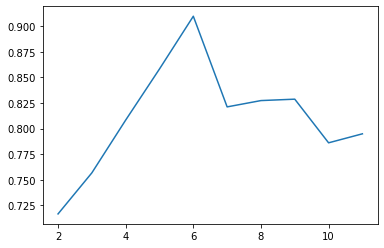

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 建立模型
score = []
# 依次轮廓系数
for i in range(10):
    model = KMeans(n_clusters=i+2)
    model.fit(feature_pca)
    score.append(silhouette_score(feature_pca, model.labels_))
# 轮廓系数绘图
plt.plot(range(2, 12, 1), score)


In [20]:
# 执行聚类
model = KMeans(n_clusters=6)
model.fit(feature_pca)
# 将类别列添加到数据集中
courses_ts_final = pd.concat(
    [courses_ts_merged, pd.Series(model.labels_, name='类别')], axis=1)
# 依照类别排序并预览数据
courses_ts_final.sort_values(by='类别', ascending=False)


,课程名称,学习人数,学习时间,平均学习时间,平均学习时间/人数,关键词 1,关键词 2,类别
205,Scala开发教程,10461,255231,24.398337,0.002332,Scala,教程,5
221,Scala 专题教程 - 抽象成员,459,1644,3.581699,0.007803,Scala,教程,5
450,Sqlmap快速上手教程,330,3213,9.736364,0.029504,Sqlmap,教程,5
401,Kafka快速上手教程,2622,28905,11.024027,0.004204,Kafka,教程,5
384,Vuejs2.0 使用教程,5232,29502,5.638761,0.001078,Vuejs2,教程,5
...,...,...,...,...,...,...,...,...
173,全面解析PythonChallenge,21363,73443,3.43786,0.000161,PythonChallenge,解析,0
172,深入学习 《C++ Primer 第五版》,855,170739,199.694737,0.233561,Primer,深入,0
171,Android小案例 - Fragment（片段）,3051,12342,4.045231,0.001326,Android,Fragment,0
170,掌阅科技Python工程师,1989,825,0.414781,0.000209,掌阅,Python,0
